In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data using pandas
df=pd.read_csv('data_1.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
# give statistical summary of numerical columns
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

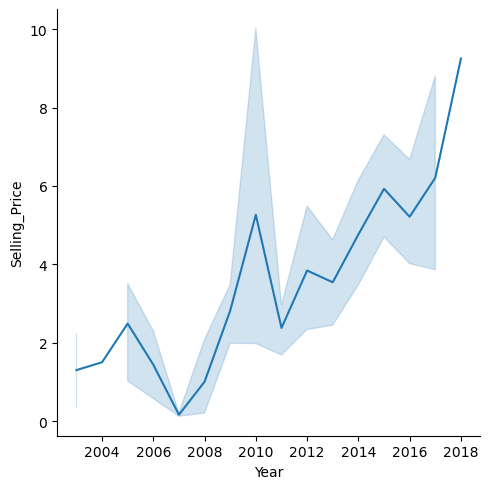

In [6]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')

In [7]:
# to track down the selling price what is highest and lowest and mean
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [8]:
# All the figures are in lacs minimum selling price is 10000 and maximum selling price is 3500000

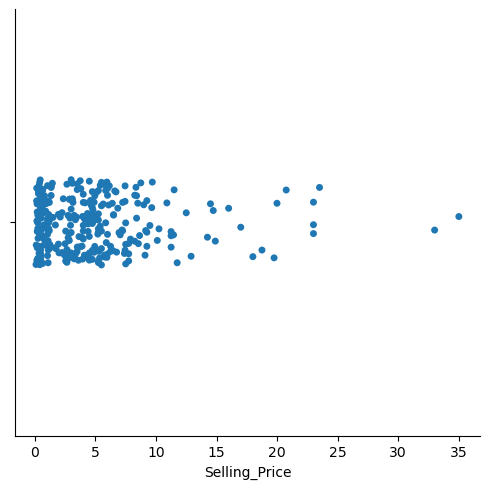

In [9]:
sns.catplot('Selling_Price',data=df)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

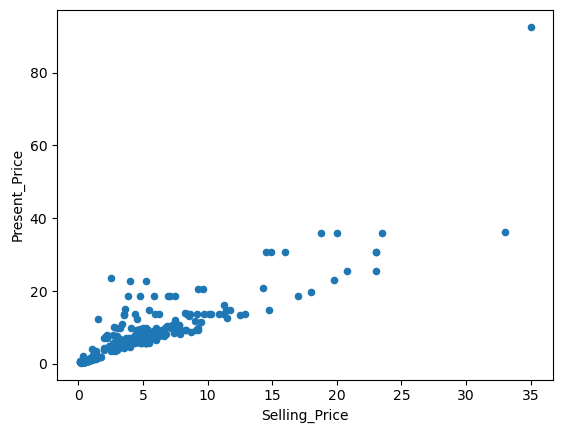

In [10]:
# plotting relationship between selling and present price
df.plot.scatter(x='Selling_Price',y='Present_Price')

In [11]:
# we can observe that for every year petrol cars and bikes are more for selling than diesel and CNG

<AxesSubplot:xlabel='Year', ylabel='count'>

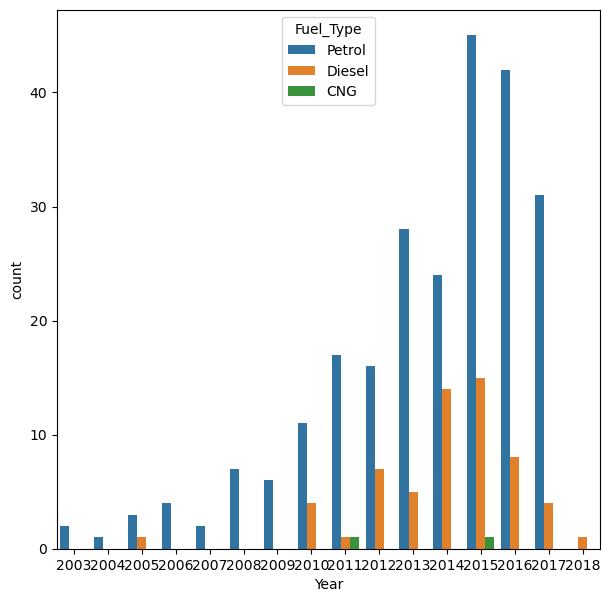

In [12]:
plt.figure(figsize=(7,7))
sns.countplot('Year',hue='Fuel_Type',data=df)

In [13]:
# plotting who has more price in transmission type manual and automatic
# we can see that automatic cars have higher price than manual cars although automatic cars are in less quantity

<Figure size 400x400 with 0 Axes>

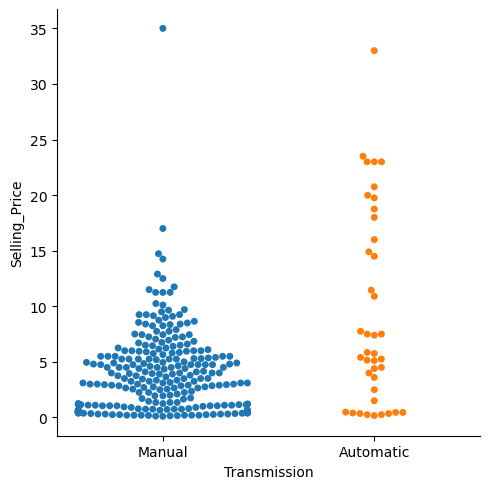

In [14]:
plt.figure(figsize=(4,4))
sns.catplot(data=df,kind='swarm',x='Transmission',y='Selling_Price',split=True)

In [15]:
# checking if kilometers driven affect the selling price

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

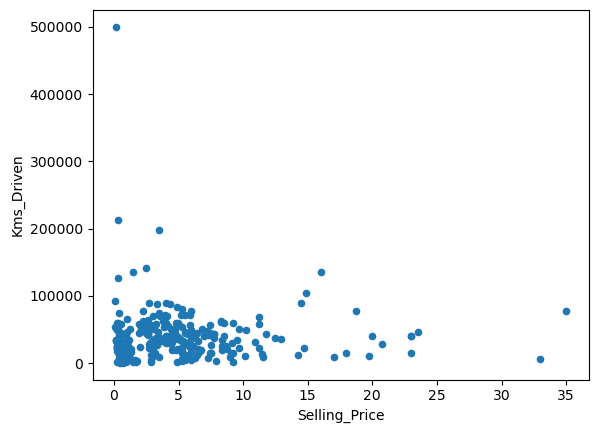

In [16]:
df.plot.scatter('Selling_Price','Kms_Driven')

ValueError: Could not interpret value `data=df` for parameter `x`

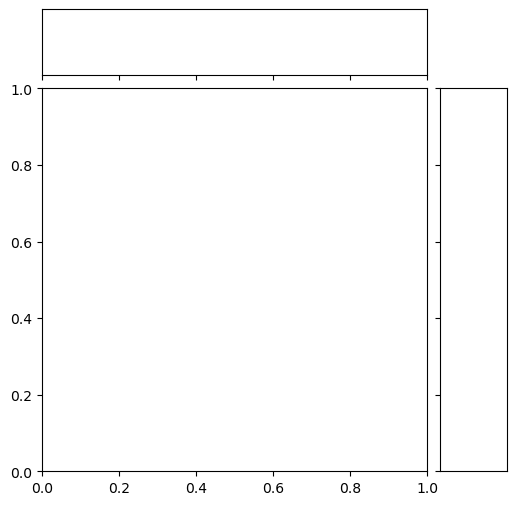

In [17]:
sns.jointplot('data=df',x='Year',y='Fuel_Type')

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

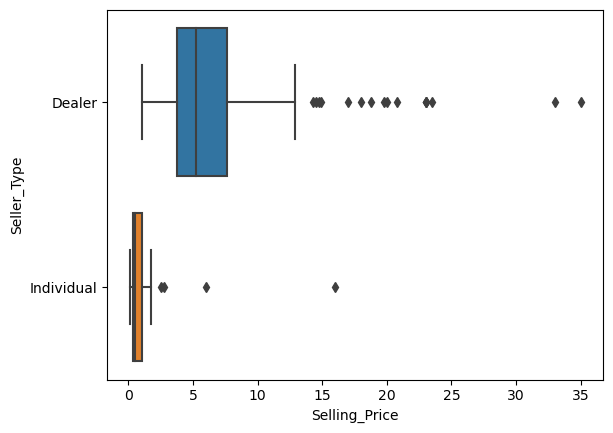

In [18]:
sns.boxplot(x='Selling_Price',y='Seller_Type',data=df)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

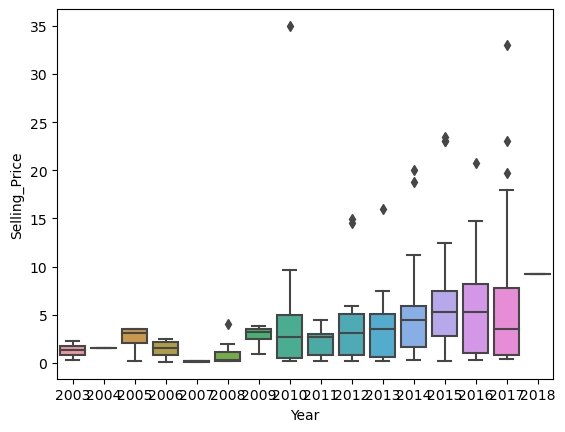

In [19]:
sns.boxplot(x='Year',y='Selling_Price',data=df)

In [20]:
# dropping car name columns as it has many number of unique columns as our dataset is very short

In [21]:
df.drop('Car_Name',axis=1,inplace=True)
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [22]:
# converting year column into number of years selling car is old

In [23]:
df['curr_Year']=2023
df['Years']=df.curr_Year-df.Year
df.drop(['Year','curr_Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [24]:
# listing down how many categorical columns we have and how many unique values they consist

In [25]:
categorical_columns=df.select_dtypes(include='object')
for i in categorical_columns:
    print('column name {} -> {} : {}'.format(i,df[i].nunique(),df[i].unique()))

column name Fuel_Type -> 3 : ['Petrol' 'Diesel' 'CNG']
column name Seller_Type -> 2 : ['Dealer' 'Individual']
column name Transmission -> 2 : ['Manual' 'Automatic']


In [26]:
# getting dummies for these categorical columns we can also use df.replace as unique values are less

In [27]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


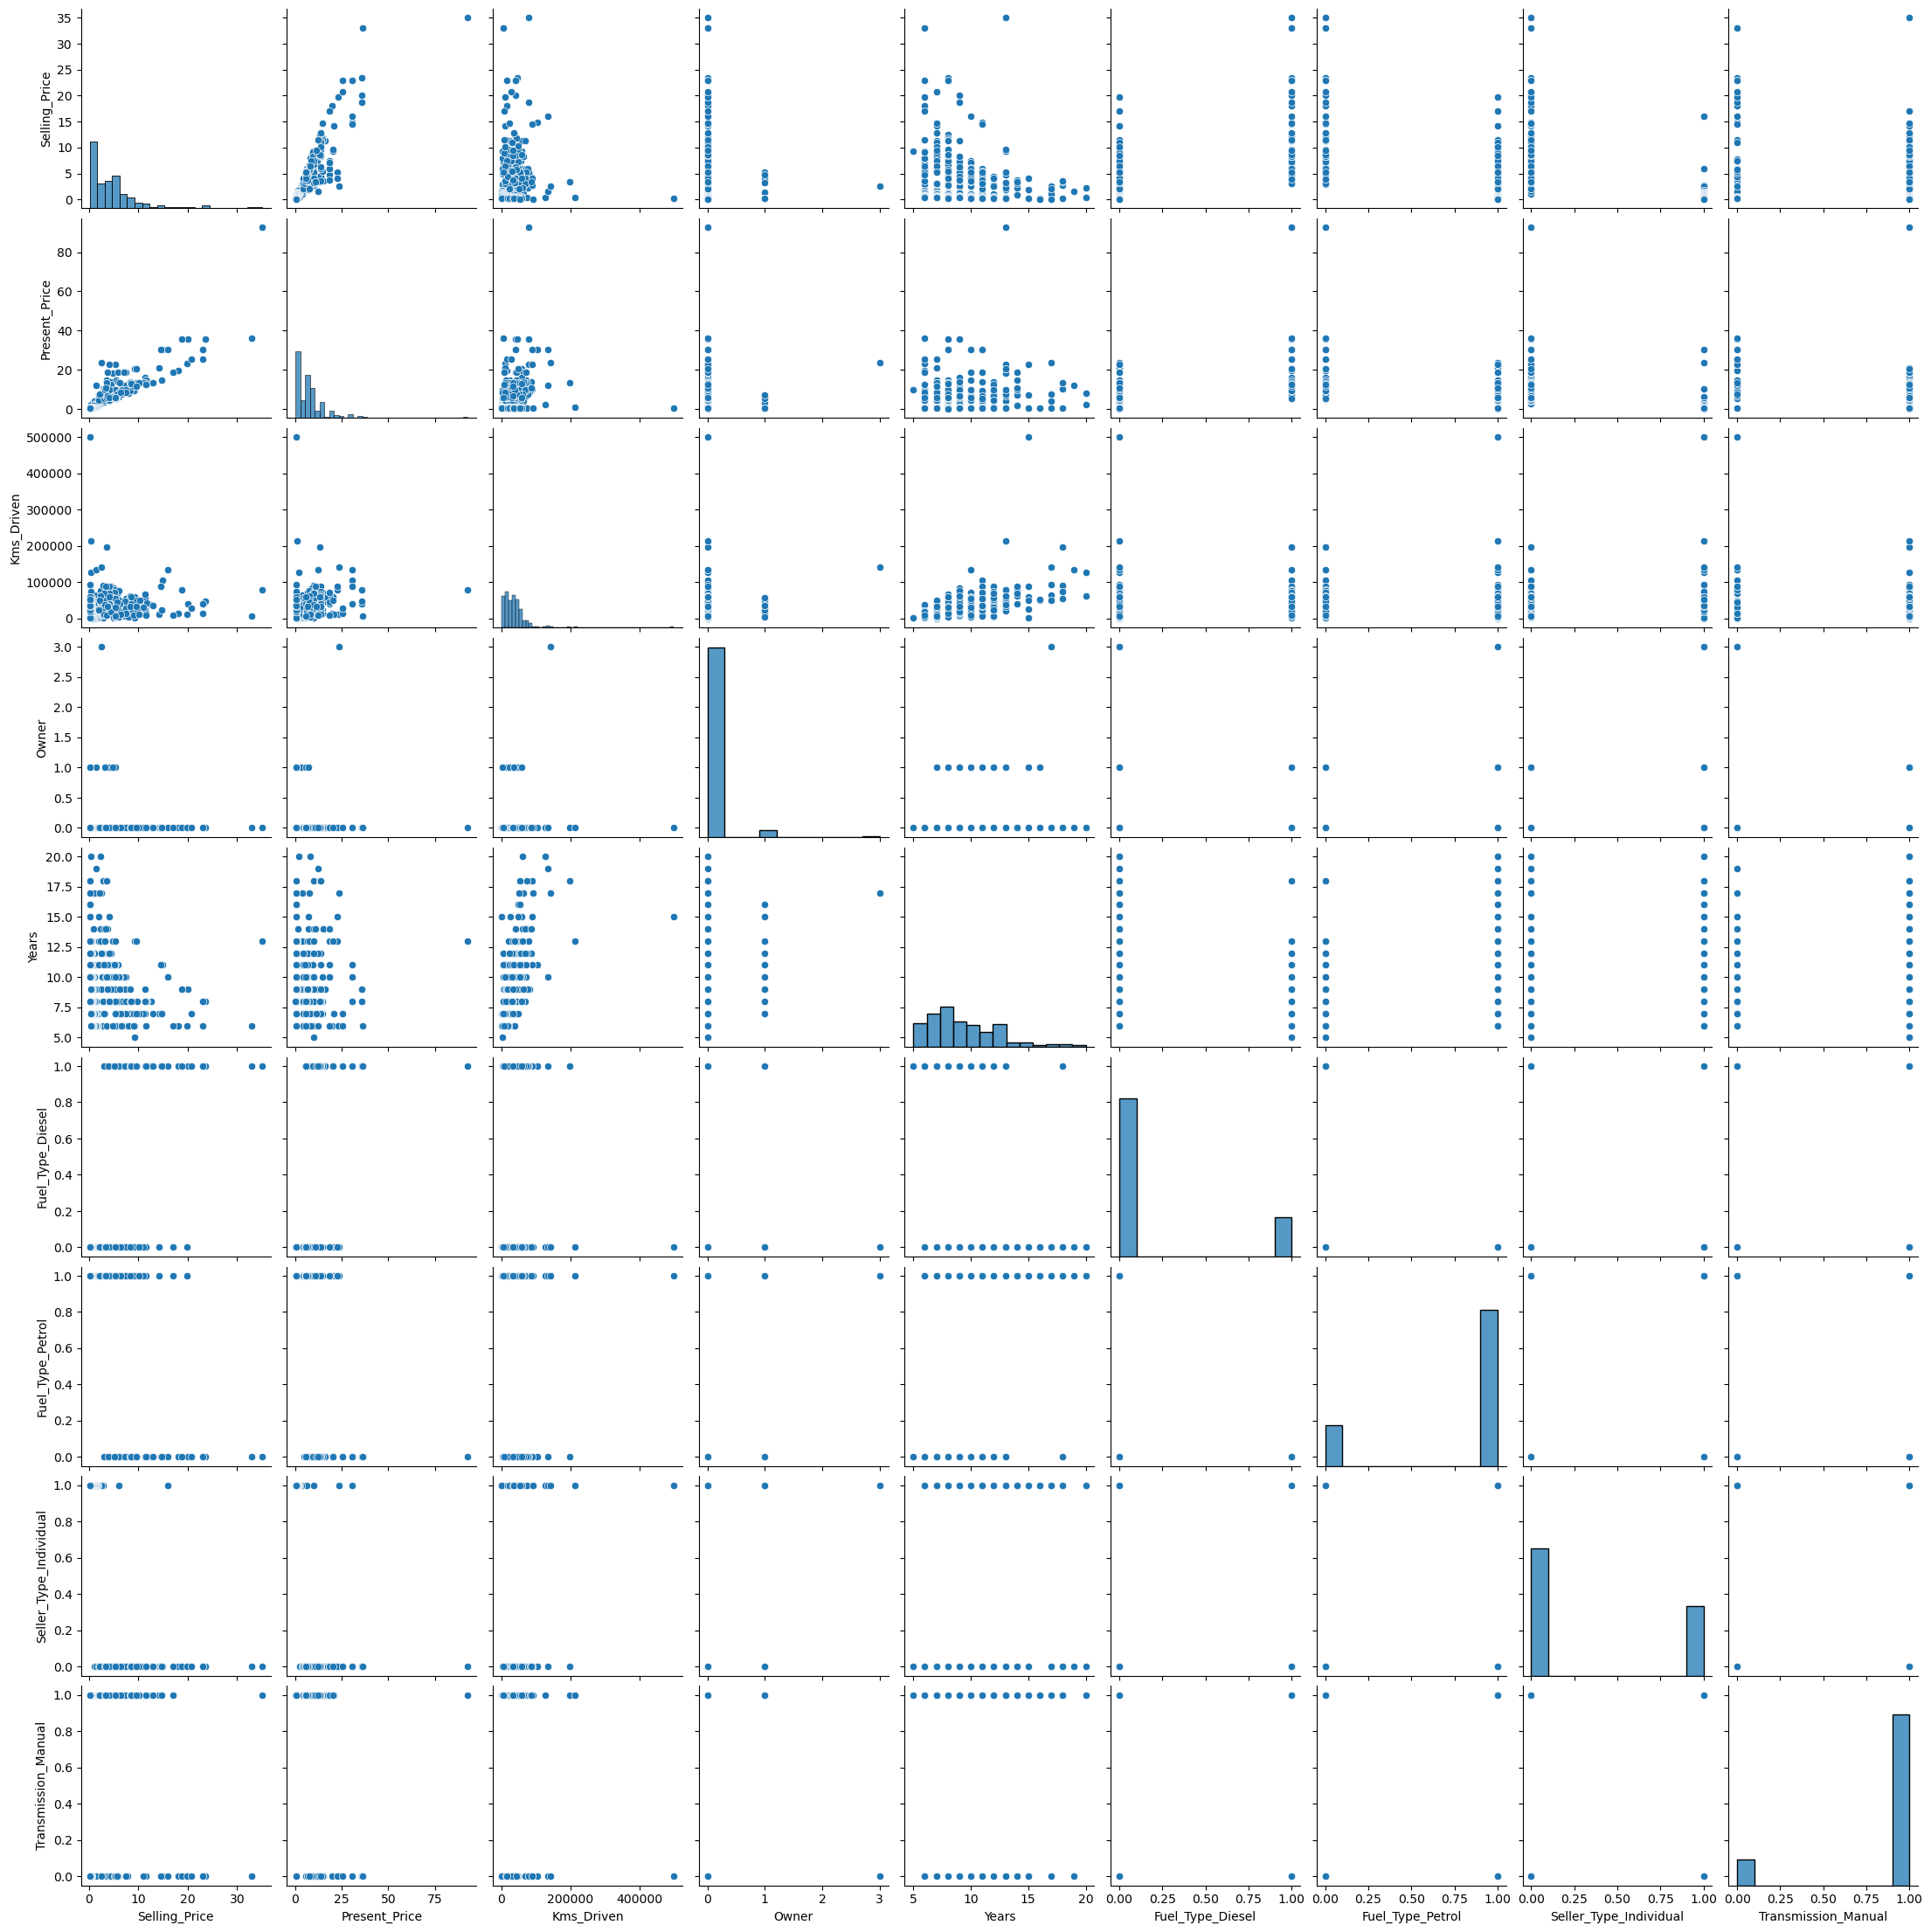

In [28]:
sns.pairplot(data=df)

In [29]:
# plotting correlation between dataset column by using heatmap

<AxesSubplot:>

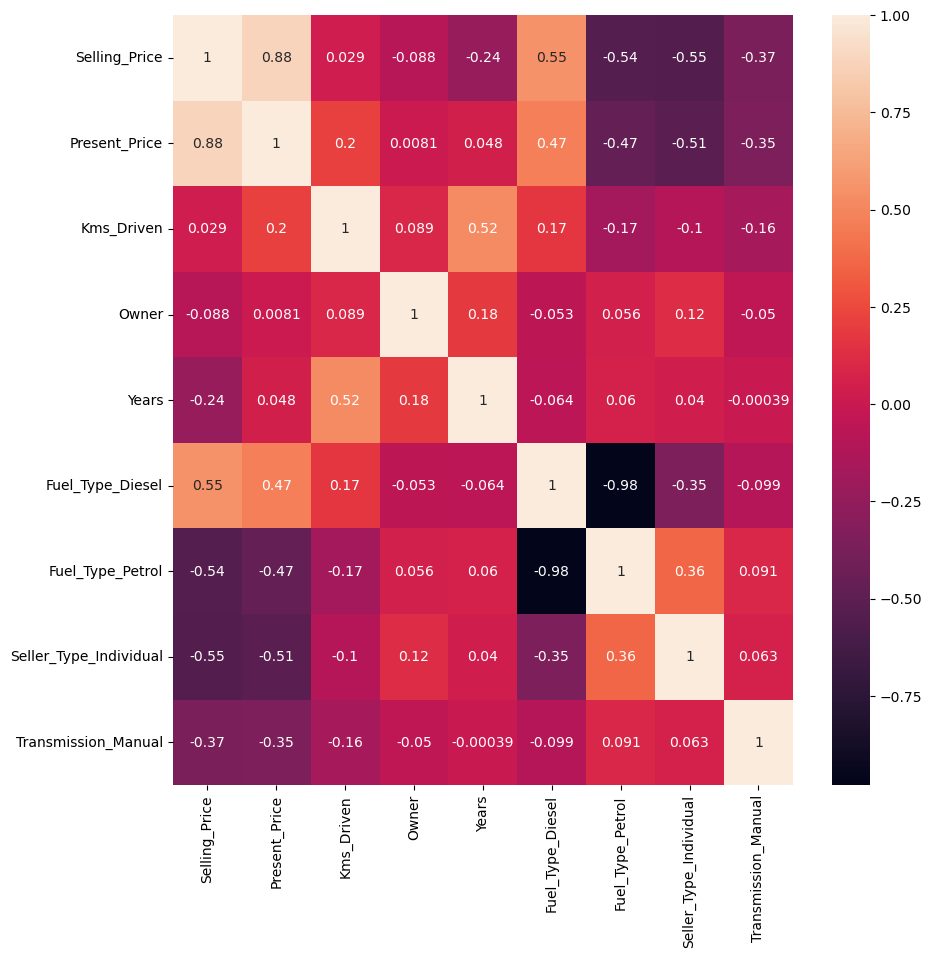

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [31]:
# taking dependent and independent columns into different variables

In [33]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [34]:
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [35]:
# plotting graph for correlatin between dependent and independent column

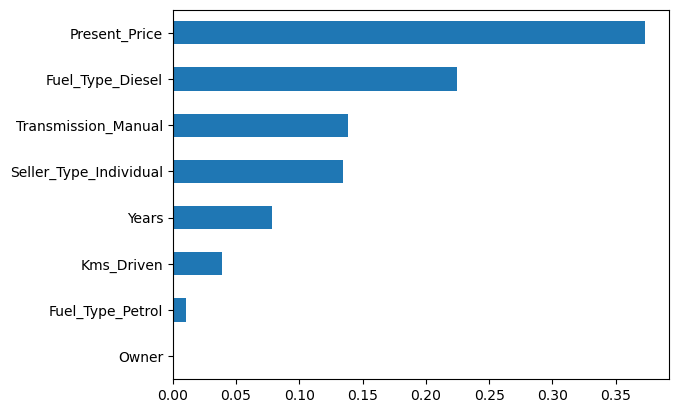

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
print(X_train[0])
print(X_test[0])

[0.00465973 0.05105105 0.33333333 0.64285714 0.         1.
 1.         1.        ]
[0.00270915 0.04704705 0.         0.07142857 0.         1.
 1.         0.        ]


In [41]:
# logistic regression

In [44]:
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8489813024899066

In [45]:
# SVM

In [46]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.697073095119109

In [47]:
# decision tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9366155992253902

In [49]:
# random forest regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9585533785293683